In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [2]:
from google.colab import files

print("Upload movies.csv")
uploaded = files.upload()

Upload movies.csv


Saving movies.csv to movies.csv


In [3]:
print("Upload ratings.csv")
uploaded = files.upload()

Upload ratings.csv


Saving ratings.csv to ratings.csv


In [4]:
movies = pd.read_csv('movies.csv')  # replace filename if needed
ratings = pd.read_csv('ratings.csv')

print("Movies Dataset:")
display(movies.head())

print("Ratings Dataset:")
display(ratings.head())


Movies Dataset:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Ratings Dataset:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


from matplotlib import pyplot as plt
_df_0['movieId'].plot(kind='hist', bins=20, title='movieId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='movieId', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='rating', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['userId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'userId'}, axis=1)
              .sort_values('userId', ascending=True))
  xs = counted['userId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('userId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('userId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['movieId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'movieId'}, axis=1)
              .sort_values('movieId', ascending=True))
  xs = counted['movieId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('movieId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('movieId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['rating']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'rating'}, axis=1)
              .sort_values('rating', ascending=True))
  xs = counted['rating']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('rating', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rating')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['movieId'].plot(kind='line', figsize=(8, 4), title='movieId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [5]:
print("Number of Movies:", movies.shape[0])
print("Number of Ratings:", ratings.shape[0])


Number of Movies: 9742
Number of Ratings: 100836


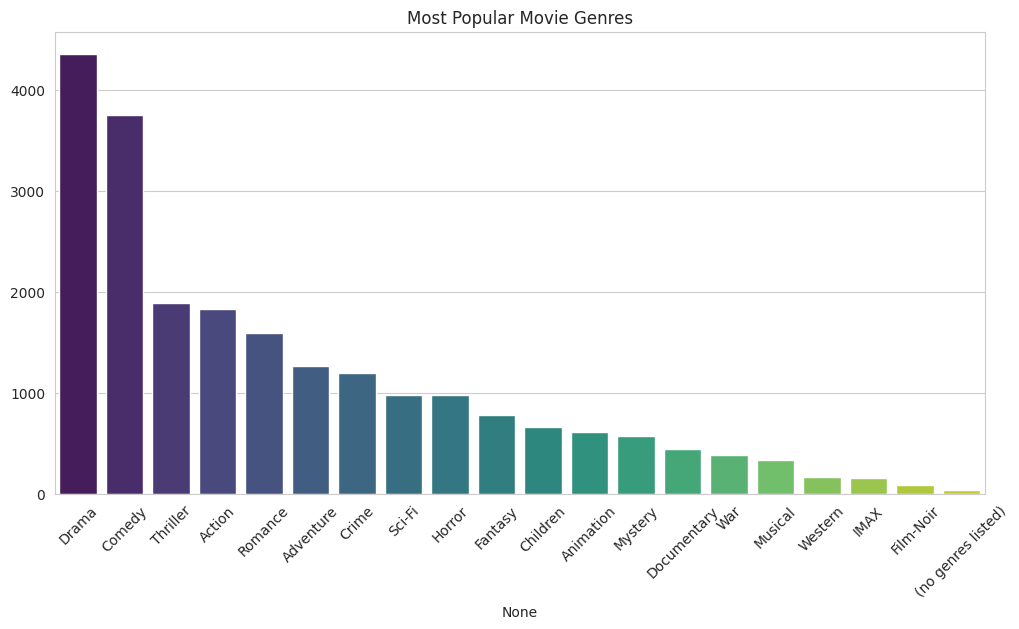

In [6]:
all_genres = movies['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=all_genres.index, y=all_genres.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Most Popular Movie Genres")
plt.show()


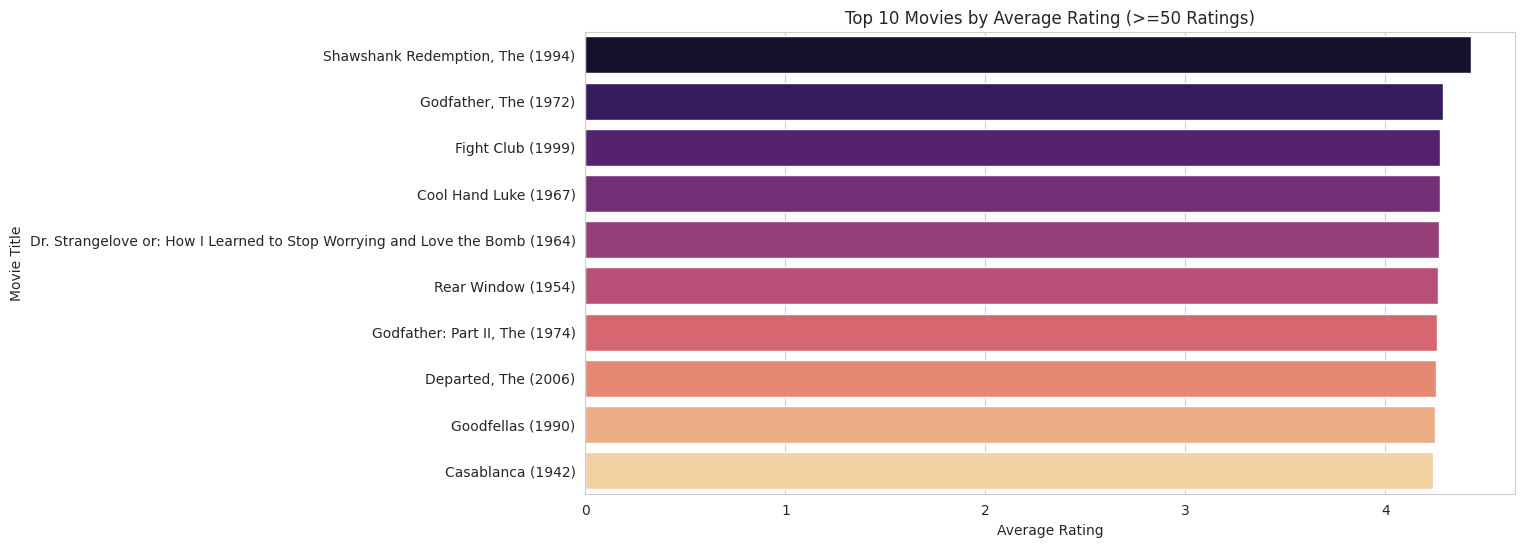

In [7]:
movie_stats = ratings.groupby('movieId').agg({'rating': ['mean','count']})
movie_stats.columns = ['average_rating','num_ratings']
movie_stats = movie_stats.reset_index()
movie_stats = movie_stats.merge(movies, on='movieId')

# Filter movies with at least 50 ratings for reliability
popular_movies = movie_stats[movie_stats['num_ratings'] >= 50].sort_values('average_rating', ascending=False)

# Top 10 movies
plt.figure(figsize=(12,6))
sns.barplot(x='average_rating', y='title', data=popular_movies.head(10), palette='magma')
plt.title("Top 10 Movies by Average Rating (>=50 Ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()


In [8]:
movies['genres_clean'] = movies['genres'].str.replace('|', ' ')

# Vectorize genres
cv = CountVectorizer()
genre_matrix = cv.fit_transform(movies['genres_clean'])

# Compute similarity
genre_similarity = cosine_similarity(genre_matrix)

# Function to recommend movies
def recommend_movie(movie_name):
    if movie_name not in movies['title'].values:
        return "Movie not found. Please check spelling."

    idx = movies[movies['title'] == movie_name].index[0]
    sim_scores = list(enumerate(genre_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # top 5 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices].values

# Test recommendation
movie_test = "Toy Story (1995)"
print(f"Movies similar to '{movie_test}':")
print(recommend_movie(movie_test))

Movies similar to 'Toy Story (1995)':
['Antz (1998)' 'Toy Story 2 (1999)'
 'Adventures of Rocky and Bullwinkle, The (2000)'
 "Emperor's New Groove, The (2000)" 'Monsters, Inc. (2001)']


In [11]:
movie_input = input("Enter a movie you like: ")
recommended = recommend_movie(movie_input)
if isinstance(recommended, str):
    print(recommended)
else:
    print("You might also like:")
    for i, movie in enumerate(recommended,1):
        print(f"{i}. {movie}")


Enter a movie you like: Toy Story (1995)
You might also like:
1. Antz (1998)
2. Toy Story 2 (1999)
3. Adventures of Rocky and Bullwinkle, The (2000)
4. Emperor's New Groove, The (2000)
5. Monsters, Inc. (2001)


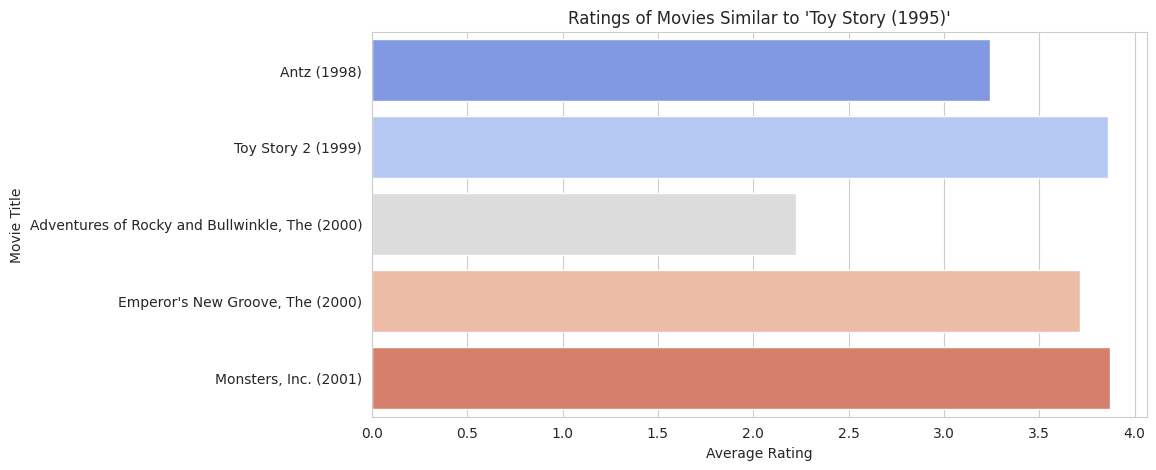

In [12]:
if not isinstance(recommended, str):
    rec_ratings = movie_stats[movie_stats['title'].isin(recommended)]
    plt.figure(figsize=(10,5))
    sns.barplot(x='average_rating', y='title', data=rec_ratings, palette='coolwarm')
    plt.title(f"Ratings of Movies Similar to '{movie_input}'")
    plt.xlabel("Average Rating")
    plt.ylabel("Movie Title")
    plt.show()


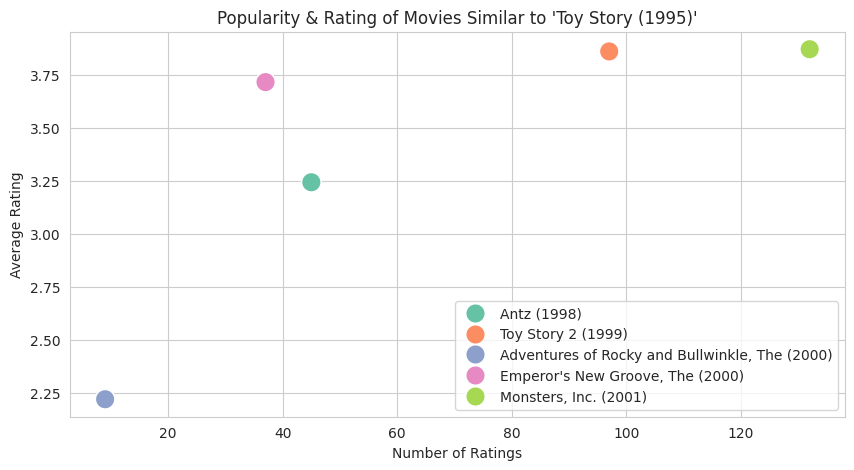

In [13]:
if not isinstance(recommended, str):
    plt.figure(figsize=(10,5))
    sns.scatterplot(x='num_ratings', y='average_rating', data=rec_ratings, hue='title', s=200, palette='Set2')
    plt.title(f"Popularity & Rating of Movies Similar to '{movie_input}'")
    plt.xlabel("Number of Ratings")
    plt.ylabel("Average Rating")
    plt.legend()
    plt.show()

In [14]:
movies.to_csv('movies_clean.csv', index=False)
print("Clean movie dataset saved as 'movies_clean.csv'")


Clean movie dataset saved as 'movies_clean.csv'
